In [51]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandasql import sqldf
from IPython.display import display
%matplotlib inline

In [5]:
cnx = sqlite3.connect('C:\\Users\\ashif\\Documents\\acd\\database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [6]:
df.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [7]:
df.shape

(183978, 42)

In [8]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
df.set_index('id',inplace=True)

In [10]:
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [12]:
df.describe()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [13]:
df.isnull().sum(axis=0)

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [14]:
df.dropna(axis=0, how='all',thresh=38, inplace=True)

In [15]:
df.isnull().sum(axis=0)

player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           0
potential                0
preferred_foot           0
attacking_work_rate    911
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
reactions                0
balance                  0
shot_power               0
jumping                  0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
marking                  0
standing_tackle          0
sliding_tackle           0
gk_diving                0
g

In [16]:
df['preferred_foot'].value_counts()

right    136953
left      44312
Name: preferred_foot, dtype: int64

Text(0.5,1,'Count Of Preferred Foot')

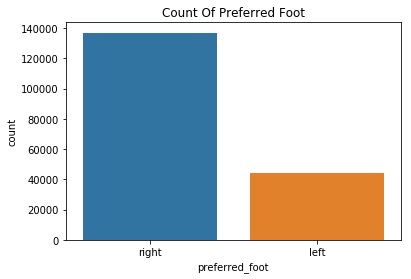

In [17]:
sns.countplot(df.preferred_foot)
plt.title('Count Of Preferred Foot')

In [18]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

Text(0.5,1,'Count Of Attacking Work Rate')

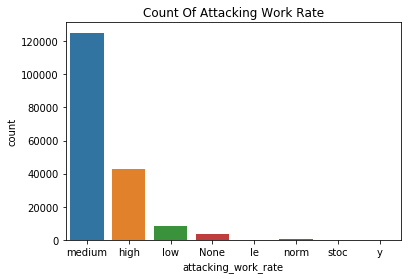

In [19]:
sns.countplot(df.attacking_work_rate)
plt.title('Count Of Attacking Work Rate')

In [20]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

Text(0.5,1,'Count Of Defensive Work Rate')

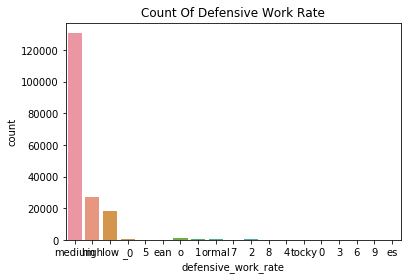

In [21]:
sns.countplot(df.defensive_work_rate)
plt.title('Count Of Defensive Work Rate')

In [22]:
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [23]:
dummy_rank0=pd.get_dummies(df['preferred_foot'],drop_first=True,prefix='preferred')
dummy_rank0.head()

,preferred_right
id,
1,1
2,1
3,1
4,1
5,1


In [24]:
df=df.join(dummy_rank0)
df.head(3)

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_right
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1


In [25]:
dummy_rank1=pd.get_dummies(df['attacking_work_rate'],drop_first=True,prefix='attacking')
dummy_rank1.head()

,attacking_high,attacking_le,attacking_low,attacking_medium,attacking_norm,attacking_stoc,attacking_y
id,,,,,,,
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0


In [26]:
df=df.join(dummy_rank1)
df.head(3)

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,gk_positioning,gk_reflexes,preferred_right,attacking_high,attacking_le,attacking_low,attacking_medium,attacking_norm,attacking_stoc,attacking_y
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,8.0,8.0,1,0,0,0,1,0,0,0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,8.0,8.0,1,0,0,0,1,0,0,0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,8.0,8.0,1,0,0,0,1,0,0,0


In [27]:
dummy_rank2=pd.get_dummies(df['defensive_work_rate'],drop_first=True,prefix='defensive')
dummy_rank2.head()

,defensive_1,defensive_2,defensive_3,defensive_4,defensive_5,defensive_6,defensive_7,defensive_8,defensive_9,defensive__0,defensive_ean,defensive_es,defensive_high,defensive_low,defensive_medium,defensive_o,defensive_ormal,defensive_tocky
id,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
df=df.join(dummy_rank2)
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,defensive_9,defensive__0,defensive_ean,defensive_es,defensive_high,defensive_low,defensive_medium,defensive_o,defensive_ormal,defensive_tocky
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,0,0,0,0,0,0,1,0,0,0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,0,0,0,0,0,0,1,0,0,0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
new_df = df.drop(['player_fifa_api_id', 'player_api_id', 'date', 'potential','preferred_foot', 'attacking_work_rate', 'defensive_work_rate'],axis=1)

In [30]:
new_df.columns

Index(['overall_rating', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'preferred_right', 'attacking_high', 'attacking_le',
       'attacking_low', 'attacking_medium', 'attacking_norm', 'attacking_stoc',
       'attacking_y', 'defensive_1', 'defensive_2', 'defensive_3',
       'defensive_4', 'defensive_5', 'defensive_6', 'defensive_7',
       'defensive_8', 'defensive_9', 'defensive__0', 'defensive_ean',
       'defensive_es', 'defensive_high', 'defensive_low', 'defensive_medium',
       'defensive_o', 'defensive_ormal', 

In [31]:
new_df.head(3)

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,defensive_9,defensive__0,defensive_ean,defensive_es,defensive_high,defensive_low,defensive_medium,defensive_o,defensive_ormal,defensive_tocky
id,,,,,,,,,,,,,,,,,,,,,
1,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0
2,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0
3,62.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0


# Using Linear Regression

In [32]:

X=new_df.iloc[:,1:].values
y=new_df.iloc[:,:1].values


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred_test=lm.predict(X_test)

In [36]:
y_pred_test

array([[70.73204292],
       [61.29764666],
       [68.61620986],
       ...,
       [57.66662526],
       [74.05707099],
       [68.11374335]])

In [37]:
y_pred_train=lm.predict(X_train)

In [38]:
y_pred_train

array([[63.28178848],
       [75.32107882],
       [72.16882934],
       ...,
       [58.7740034 ],
       [75.90201253],
       [85.09150989]])

In [39]:
print(lm.coef_)

[[-1.11655078e-02  1.30370232e-02  9.91498674e-02  7.66098032e-02
  -8.66682576e-04 -1.18527904e-02  1.18665397e-02  1.01723038e-02
   1.72103099e-02  2.30548163e-01  3.98060064e-02  5.00400578e-02
  -1.27241112e-02  2.75902616e-01  2.03525837e-03  2.31583124e-02
   1.28827647e-02 -1.66405683e-02  6.01173992e-02 -2.02467457e-02
   1.03722197e-02  1.84529932e-02 -1.77764684e-02  8.43106511e-03
   1.52103179e-02  3.14249328e-02  1.34812418e-02 -2.62195604e-02
   2.08861694e-01  5.61150882e-02 -2.83043273e-02  7.91040850e-02
   4.47168714e-02 -5.94849723e-02  3.15268719e-03 -7.31945013e-01
   1.44074569e+00 -1.38485990e-01  3.60167635e-01  9.62598947e-02
   1.55617624e+00  1.67725661e+00  7.12104936e-01  1.00236078e+00
  -7.33757903e-01 -5.27401954e-01  1.20595532e+00  1.49232165e+00
   1.75979049e+00  7.49293690e-01  2.63693017e-01 -7.31945013e-01
   1.55617624e+00  1.30135769e+00  1.60476370e+00  9.70243617e-01
   5.02918066e-01  3.60167635e-01  9.62598947e-02]]


In [40]:
print(lm.intercept_)

[5.14110347]


In [41]:
lm.score(X_train,y_train)

0.7878065411979123

In [42]:
lm.score(X_test,y_test)

0.7832817701940191

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred_test)

0.7832817701940191

In [45]:
sqrt(mean_squared_error(y_pred_test, y_test))

3.2592260282612755

In [46]:
lm = smf.ols(formula='overall_rating ~ crossing + finishing + heading_accuracy + short_passing + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + attacking_high + attacking_low + attacking_norm + attacking_y + defensive_1 + defensive_2 + defensive_3 + defensive_6 + defensive_7 + defensive_8 + defensive_9 + defensive__0 + defensive_es + defensive_high + defensive_low + defensive_medium + defensive_o + defensive_ormal + preferred_right', data=new_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Wed, 10 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:31:00   Log-Likelihood:            -4.7076e+05
No. Observations:              181265   AIC:                         9.416e+05
Df Residuals:                  181216   BIC:                         9.421e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8482      0.157     30.805      0.000       4.540       5.157
crossing              -0.0099      0.001    -10.231      0.000      -0.012      -0.008
finishing              0.0128      0.001     12.393      0.000       0.011       0.015
heading_accuracy       0.0990      0.001    106.306      0.000       0.097       0.101
short_passing          0.0760      0.002     47.465      0.000       0.073       0.079
dribbling             -0.0100      0.001     -7.373      0.000      -0.013      -0.007
curve                  0.0115      0.001     12.502      0.000       0.010       0.013
free_kick_accuracy     0.0102      0.001     12.285      0.000       0.009       0.012
long_passing           0.0168      0.001     15.372      0.000       0.015       0.019
ball_control           0.2300      0.002    128.150      0.000       0.227       0.234
acceleration           0.0408      0.002     25.759      0.000       0.038       0.044
sprint_speed           0.0490      0.002     32.351      0.000       0.046       0.052
agility               -0.0133      0.001    -11.651      0.000      -0.016      -0.011
reactions              0.2762      0.001    226.250      0.000       0.274       0.279
shot_power             0.0231      0.001     22.689      0.000       0.021       0.025
jumping                0.0130      0.001     15.789      0.000       0.011       0.015
stamina               -0.0157      0.001    -16.454      0.000      -0.018      -0.014
strength               0.0592      0.001     62.059      0.000       0.057       0.061
long_shots            -0.0208      0.001    -19.667      0.000      -0.023      -0.019
aggression             0.0104      0.001     13.011      0.000       0.009       0.012
interceptions          0.0178      0.001     20.795      0.000       0.016       0.019
positioning           -0.0183      0.001    -19.950      0.000      -0.020      -0.017
vision                 0.0085      0.001      8.447      0.000       0.007       0.010
penalties              0.0155      0.001     17.813      0.000       0.014       0.017
marking                0.0328      0.001     25.188      0.000       0.030       0.035
standing_tackle        0.0132      0.002      8.761      0.000       0.010       0.016
sliding_tackle        -0.0269      0.001    -20.990      0.000      -0.029      -0.024
gk_diving              0.2072      0.002    122.382      0.000       0.204       0.210
gk_handling            0.0571      0.002     25.589      0.000       0.053       0.062
gk_kicking            -0.0288      0.001    -39.687      0.000      -0.030      -0.027
gk_positioning         0.0776      0.002     34.944      0.000       0.073       0.082
gk_reflexes            0.0466      0.002     21.387      0.000       0.042       0.051
attacking_high         0.1342      0.0

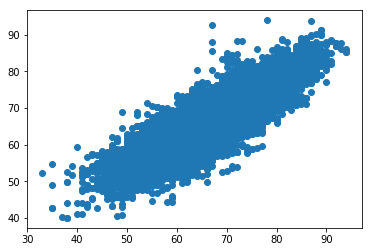

In [82]:
plt.scatter(y_test,y_pred_test)

# Using DecisionTree Regresor

In [90]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [91]:
y_pred = dtree.predict(X_test)

In [92]:
y_pred

array([68., 60., 70., ..., 55., 72., 70.])

In [93]:
dtree.score(X_test,y_test)

0.961332714421345

In [94]:
dtree.score(X_train,y_train)

0.9992168143559769

In [96]:
sqrt(mean_squared_error(y_pred, y_test))

1.376697743554991

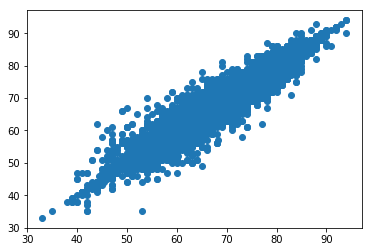

In [97]:
plt.scatter(y_pred,y_test)